<a href="https://colab.research.google.com/github/thanachod/eda-Video-Games-Sales/blob/main/ds_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/content/Video Games Sales.csv')
data.head()

,index,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review
0,0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,40.43,28.39,3.77,8.54,81.12,76.28
1,1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,91.00
2,2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,14.50,12.22,3.63,3.21,33.55,82.07
3,3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,14.82,10.51,3.18,3.01,31.52,82.65
4,4,5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,88.00


# Data understanding
- dataframe `shape`
- `head` and `tail`
- `dtypes`
- `describe`

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1907 entries, 0 to 1906
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1907 non-null   int64  
 1   Rank           1907 non-null   int64  
 2   Game Title     1907 non-null   object 
 3   Platform       1907 non-null   object 
 4   Year           1878 non-null   float64
 5   Genre          1907 non-null   object 
 6   Publisher      1905 non-null   object 
 7   North America  1907 non-null   float64
 8   Europe         1907 non-null   float64
 9   Japan          1907 non-null   float64
 10  Rest of World  1907 non-null   float64
 11  Global         1907 non-null   float64
 12  Review         1907 non-null   float64
dtypes: float64(7), int64(2), object(4)
memory usage: 193.8+ KB


In [ ]:
data['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Puzzle', 'Misc', 'Shooter',
       'Simulation', 'Role-Playing', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [ ]:
data.describe()

,index,Rank,Year,North America,Europe,Japan,Rest of World,Global,Review
count,1907.0000,1907.0000,1878.000000,1907.000000,1907.000000,1907.000000,1907.000000,1907.000000,1907.000000
mean,953.0000,954.0000,2003.766773,1.258789,0.706675,0.317493,0.206471,2.489240,79.038977
std,550.6478,550.6478,5.895369,1.956560,1.148904,0.724945,0.343093,3.563159,10.616899
min,0.0000,1.0000,1983.000000,0.000000,0.000000,0.000000,0.000000,0.830000,30.500000
25%,476.5000,477.5000,2000.000000,0.510000,0.230000,0.000000,0.060000,1.110000,74.000000
50%,953.0000,954.0000,2005.000000,0.810000,0.440000,0.020000,0.130000,1.530000,81.000000
75%,1429.5000,1430.5000,2008.000000,1.375000,0.810000,0.300000,0.220000,2.540000,86.230000
max,1906.0000,1907.0000,2012.000000,40.430000,28.390000,7.200000,8.540000,81.120000,97.000000


# Data Preperation
- Dropping irrelevant columns and rows
- Identify duplicated columns
- Renaming COlumns
- Feature Creation

In [ ]:
# Checking null values
data.isnull().sum()

index             0
Rank              0
Game Title        0
Platform          0
Year             29
Genre             0
Publisher         2
North America     0
Europe            0
Japan             0
Rest of World     0
Global            0
Review            0
dtype: int64

In [ ]:
data.Genre.value_counts(sort=True)
# normalize - If True then the object returned will contain the relative frequencies of the unique values.

Sports          308
Action          275
Shooter         206
Platform        188
Racing          186
Role-Playing    173
Misc            159
Fighting        126
Adventure       110
Simulation       92
Puzzle           44
Strategy         40
Name: Genre, dtype: int64

<Axes: ylabel='Genre'>

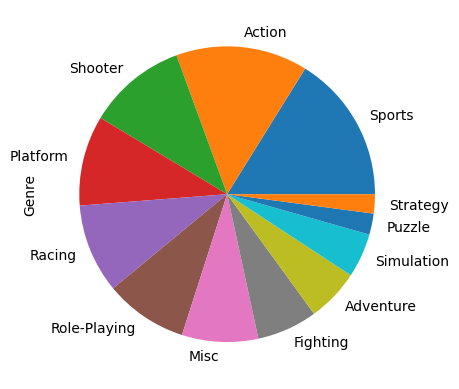

In [ ]:
data.Genre.value_counts(sort=True).plot.pie()

In [ ]:
data.Platform.value_counts(sort=True)

PS2     372
PS      223
X360    219
PS3     202
Wii     161
DS      149
GBA      75
XB       72
PC       71
PSP      63
NES      60
N64      57
GC       55
GB       48
SNES     41
3DS      15
GEN      11
DC        6
SAT       3
WiiU      2
SCD       1
PSV       1
Name: Platform, dtype: int64

<Axes: ylabel='Platform'>

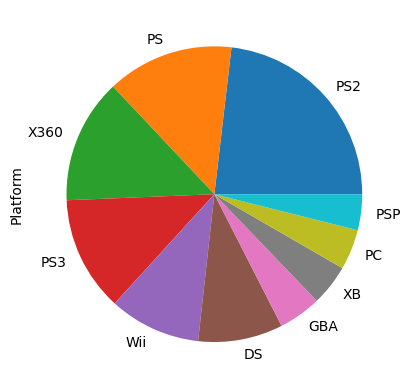

In [ ]:
data.Platform.value_counts(sort=True).head(10).plot.pie()

<Axes: >

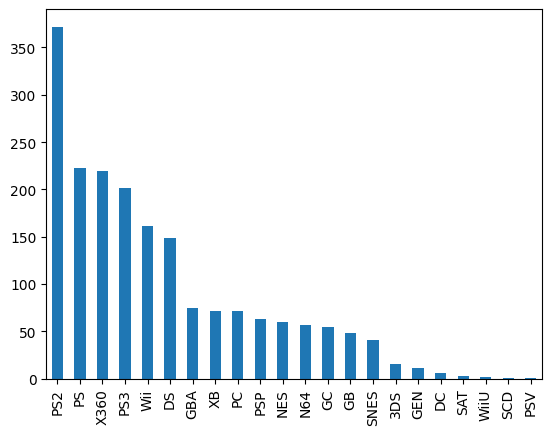

In [ ]:
data.Platform.value_counts(sort=True).plot.bar()

<Axes: >

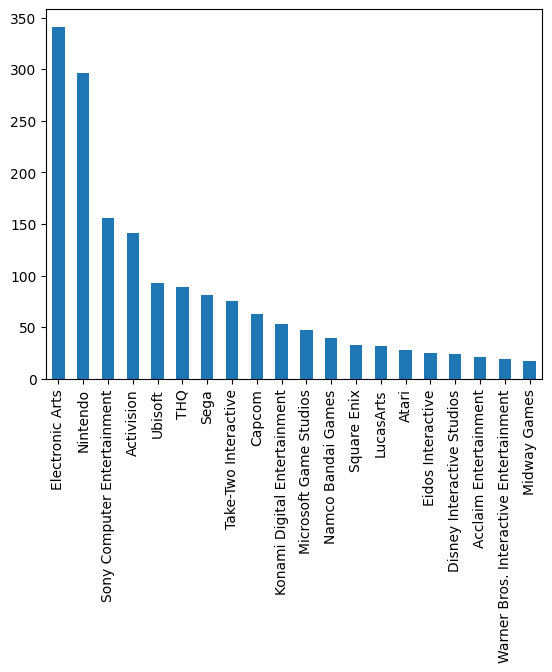

In [ ]:
data.Publisher.value_counts(sort=True).head(20).plot.bar()

In [ ]:
data.keys()

Index(['index', 'Rank', 'Game Title', 'Platform', 'Year', 'Genre', 'Publisher',
       'North America', 'Europe', 'Japan', 'Rest of World', 'Global',
       'Review'],
      dtype='object')

<Axes: >

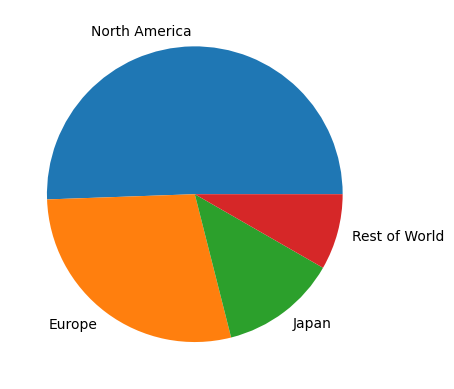

In [ ]:
data[['North America', 'Europe', 'Japan', 'Rest of World']].sum().plot.pie()

array([<Axes: ylabel='North America'>], dtype=object)

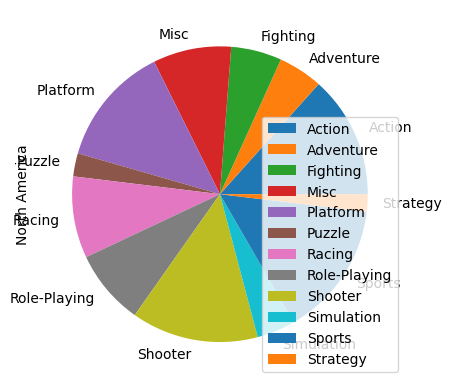

In [ ]:
data[['North America', 'Genre']].groupby('Genre').sum().plot.pie(subplots=True)

<Axes: xlabel='Year'>

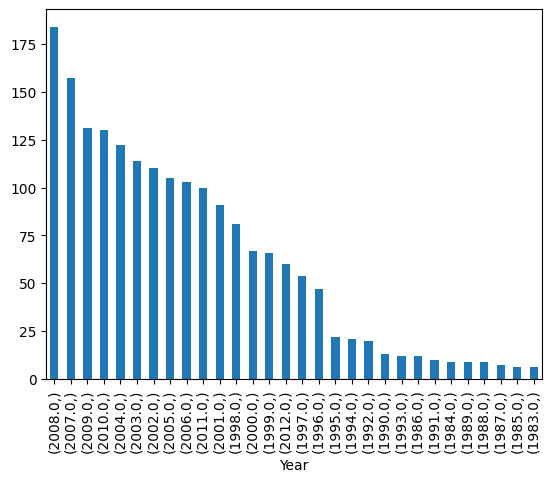

In [ ]:
# change float to int
data[['Year']].value_counts().plot.bar()

In [ ]:
data[['Game Title', 'Genre', 'Japan']]

,Game Title,Genre,Japan
0,Wii Sports,Sports,3.77
1,Super Mario Bros.,Platform,6.81
2,Mario Kart Wii,Racing,3.63
3,Wii Sports Resort,Sports,3.18
4,Tetris,Puzzle,4.22
...,...,...,...
1902,Lizzie McGuire 2: Lizzie Diaries,Action,0.00
1903,Xenoblade Chronicles,Role-Playing,0.16
1904,SingStar Abba,Misc,0.00
1905,FIFA Soccer World Championship,Sports,0.28


<ipython-input-32-d5e912dbf0f8>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data[['Game Title', 'Genre', 'Japan']].groupby('Genre').sum().nlargest(10, 'Japan').plot.bar()


<Axes: xlabel='Genre'>

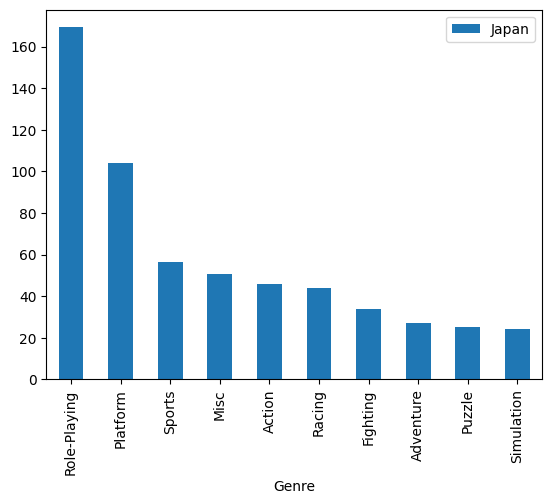

In [ ]:
data[['Game Title', 'Genre', 'Japan']].groupby('Genre').sum().nlargest(10, 'Japan').plot.bar()

<ipython-input-33-98590c60f911>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data[['Game Title', 'Genre', 'Europe']].groupby('Genre').sum().nlargest(10, 'Europe').plot.bar()


<Axes: xlabel='Genre'>

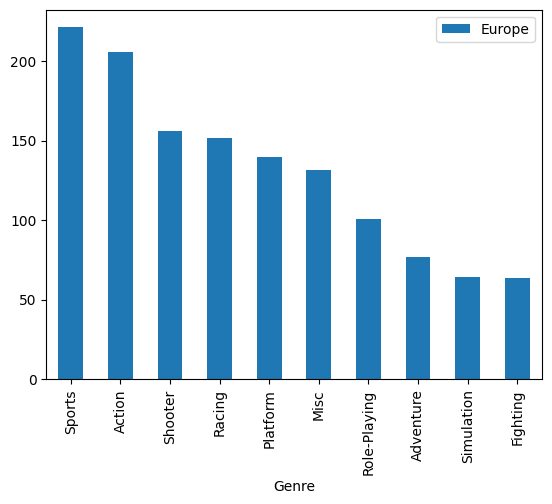

In [ ]:
data[['Game Title', 'Genre', 'Europe']].groupby('Genre').sum().nlargest(10, 'Europe').plot.bar()

<ipython-input-34-4f4da2fdc6c3>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data[['Game Title', 'Genre', 'North America']].groupby('Genre').sum().nlargest(10, 'North America').plot.bar()


<Axes: xlabel='Genre'>

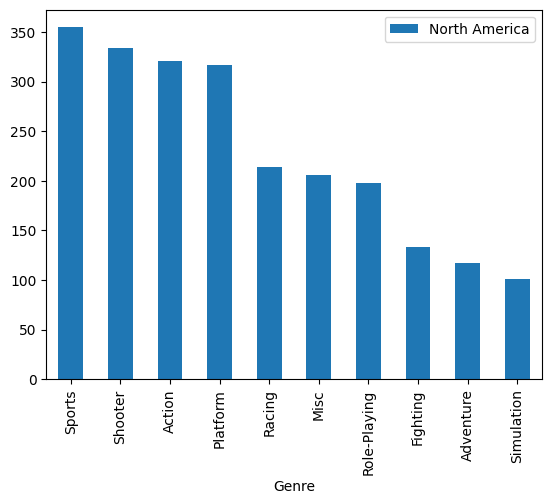

In [ ]:
data[['Game Title', 'Genre', 'North America']].groupby('Genre').sum().nlargest(10, 'North America').plot.bar()

# Feature Understanding
- plotting feature distributions
  - Histrogram
  - KDE
  - Boxplot

In [ ]:
data = data.dropna()

In [ ]:
data['Year'].astype('int32')

0       2006
1       1985
2       2008
3       2009
4       1989
        ... 
1902    2004
1903    2010
1904    2008
1905    2000
1906    2010
Name: Year, Length: 1878, dtype: int32

In [ ]:
data['Year'] = data['Year'].astype('int32')

<Axes: title={'center': 'Total games on each year'}>

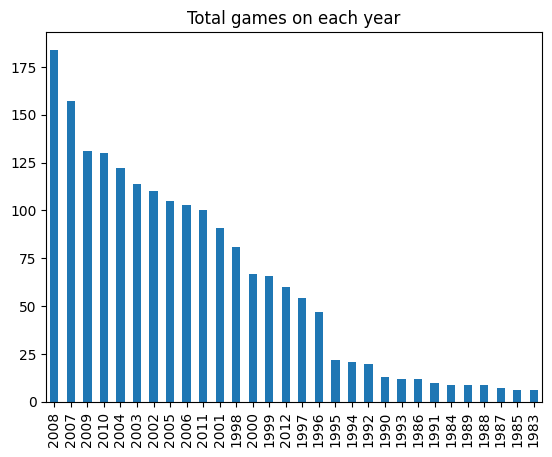

In [ ]:
data['Year']\
.value_counts()\
.plot(kind='bar', title='Total games on each year') #.plot.bar()

<Axes: title={'center': 'Score review'}, ylabel='Frequency'>

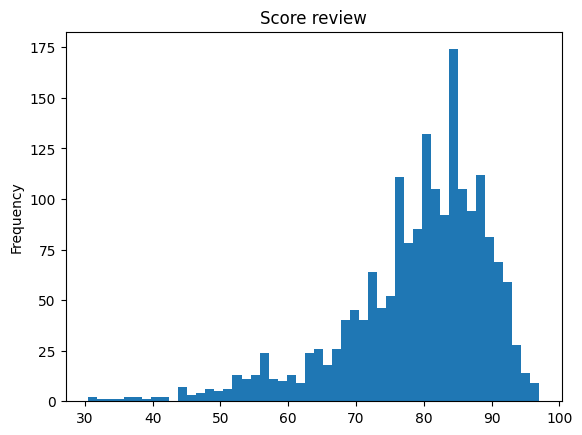

In [ ]:
data['Review'].plot(kind='hist',
                    bins=50,
                    title='Score review')

<Axes: title={'center': 'Score review'}, ylabel='Density'>

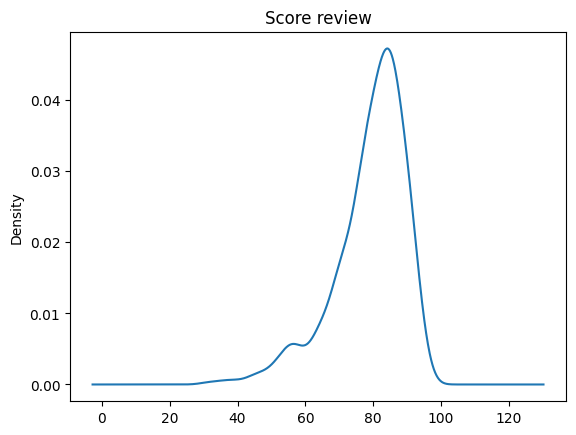

In [ ]:
data['Review'].plot(kind='kde',
                    title='Score review')

# Feature Relationships
- Scatterplot
- Heatmap Correlation
- Pairplot
- Groupby comparison

In [ ]:
data.corr()

<ipython-input-74-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,index,Rank,Year,North America,Europe,Japan,Rest of World,Global,Review
index,1.000000,1.000000,0.101943,-0.479992,-0.467101,-0.362155,-0.436006,-0.529431,-0.293816
Rank,1.000000,1.000000,0.101943,-0.479992,-0.467101,-0.362155,-0.436006,-0.529431,-0.293816
Year,0.101943,0.101943,1.000000,-0.071347,0.085549,-0.274221,0.201768,-0.047886,0.010387
North America,-0.479992,-0.479992,-0.071347,1.000000,0.723315,0.418662,0.694629,0.933607,0.175615
Europe,-0.467101,-0.467101,0.085549,0.723315,1.000000,0.402883,0.923556,0.889819,0.130154
Japan,-0.362155,-0.362155,-0.274221,0.418662,0.402883,1.000000,0.309784,0.592628,0.149139
Rest of World,-0.436006,-0.436006,0.201768,0.694629,0.923556,0.309784,1.000000,0.837850,0.137923
Global,-0.529431,-0.529431,-0.047886,0.933607,0.889819,0.592628,0.837850,1.000000,0.181890
Review,-0.293816,-0.293816,0.010387,0.175615,0.130154,0.149139,0.137923,0.181890,1.000000


<Axes: title={'center': 'Japan sales vs review score'}, xlabel='Review', ylabel='Japan'>

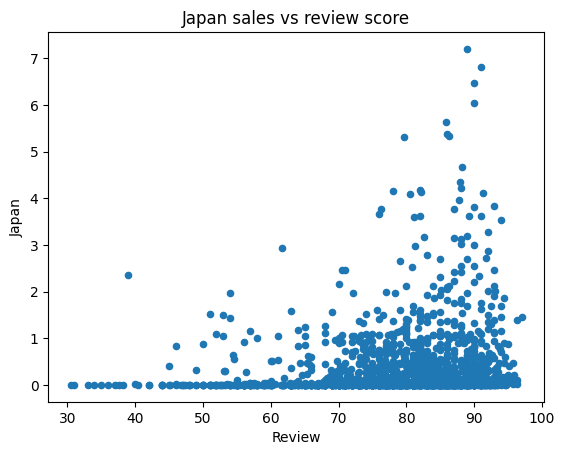

In [ ]:
data.plot(kind='scatter',
          x='Review',
          y='Japan',
          title='Japan sales vs review score')

In [ ]:
# !pip install seaborn

In [ ]:
import seaborn as sns

<ipython-input-83-b699050ce883>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


<Axes: >

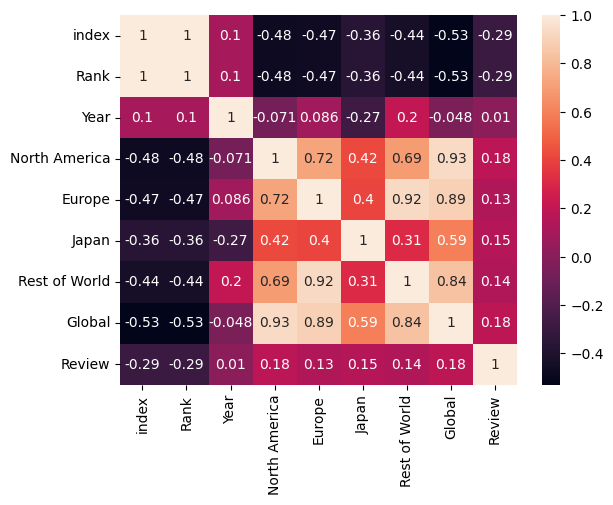

In [ ]:
sns.heatmap(data.corr(), annot=True)

# Ask a question about the data

Text(0.5, 0, 'Global game genre')

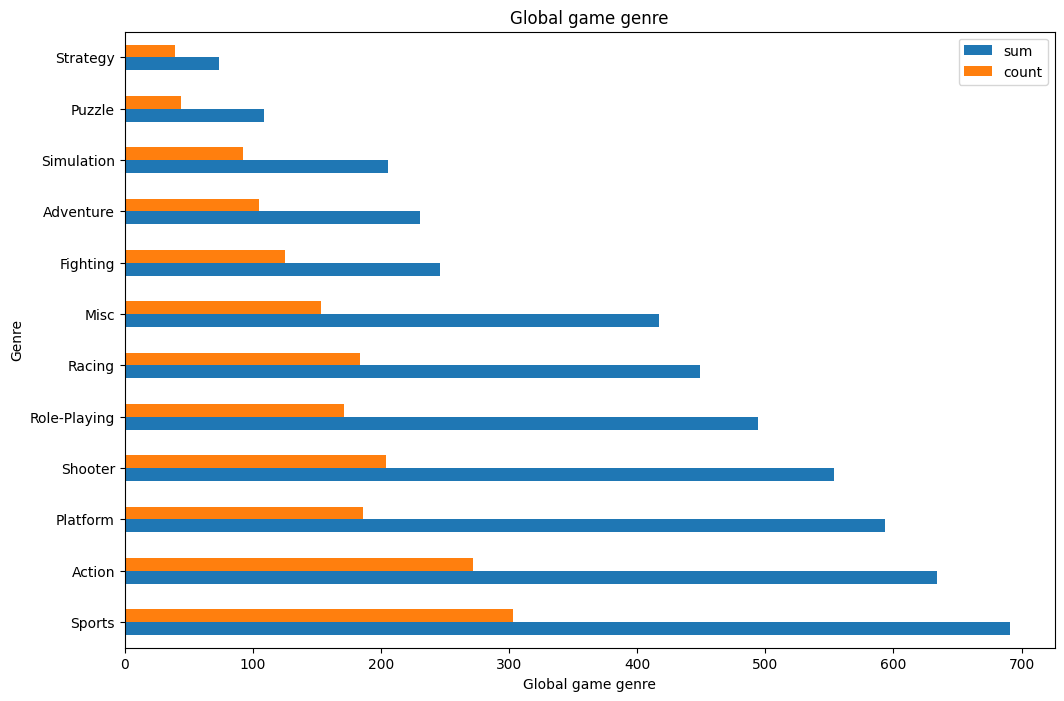

In [ ]:
ax = data.groupby('Genre')['Global']\
.agg(['sum', 'count'])\
.sort_values('sum', ascending=False)\
.plot(kind='barh', figsize=(12, 8), title='Global game genre')
ax.set_xlabel('Global game genre')
# plt.show()